# The Double Pendulum 

In the previous video, we saw how to solve the the simple pendulum. Today, we're going to look at the double pendulum. The system is a bit more complex because there are 2 dof but the method is exactly the same. 

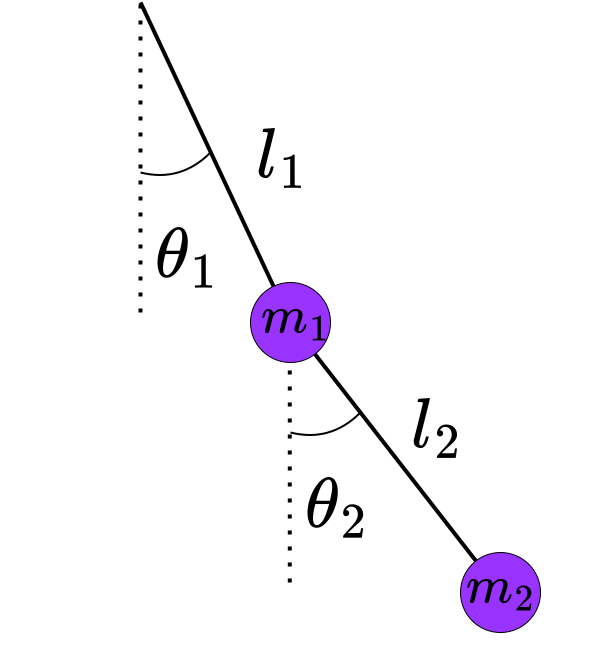


Using basic trigonometry, we see that: $$x_1 = l_1 \sin(\theta_1)$$ $$y_1 = -l_1 \cos (\theta_1)$$ $$x_2 = x_1 +l_2 \sin(\theta_2)$$ $$y_2 = y_1-l_2 \cos(\theta_2)$$

The kinetic energy is just $T = \frac 12 m_1 v_1^2 + \frac 12 m_2 v_2^2$ and the potential energy is just the weight of the masses. Using this, we can construct the Lagrangian and find the equations of motion using: 

$$ \begin{cases} \frac{ \partial L}{\partial \theta_1} = \frac d{dt} \frac{\partial L}{\partial \dot \theta_1} \\ \frac{ \partial L}{\partial \theta_2} = \frac d{dt} \frac{\partial L}{\partial \dot \theta_2}  \end{cases} $$


That's all we need so let's get to work!




In [1]:
#imports
import numpy as np 
import sympy as sp
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib import animation
from matplotlib.animation import PillowWriter
from IPython.display import HTML
plt.style.use('seaborn')

In [2]:
class DoublePendulum:
    
    def __init__(self, t, m_1, m_2, l_1, l_2, g,the1_0, the2_0, v1_0, v2_0):
        
        self.t = t
        self.m1 = m_1
        self.m2 = m_2
        self.l1 = l_1
        self.l2 = l_1
        self.g = g
        
        self.conds = [the1_0, v1_0, the2_0, v2_0]
        
        
    
    def solve(self):
        
        #symbols
        
        m1,m2,l1,l2,t,g = sp.symbols(('m1','m2','l1','l2','t','g')) #masses, lengths, time and g
        
        theta1, theta2 = sp.Function('theta1')(t), sp.Function('theta2')(t) #angles
        
        dtheta1, dtheta2 = theta1.diff(t), theta2.diff(t) #velocities
        
        ddtheta1, ddtheta2 = dtheta1.diff(t), dtheta2.diff(t) #accels
        
        
        #define x1,x2,y1,y2
        x1,y1 = l1*sp.sin(theta1), -l1*sp.cos(theta1)
        x2,y2 = x1+l2*sp.sin(theta2), y1-l2*sp.cos(theta2)
        
        
        #kinetic
        v1_sq = x1.diff(t)**2 + y1.diff(t)**2
        v2_sq =x2.diff(t)**2 + y2.diff(t)**2
        
        T = sp.Rational(1,2)*m1*v1_sq + sp.Rational(1,2)*m2*v2_sq
        
        #potential
        
        V = m1*g*y1 +m2*g*y2
        
        #Lagrangian
        L = T-V
        
        
        #equations
        def get_eqs(L, theta, dtheta):
            
            rhs = L.diff(theta)
            
            lhs = sp.diff( L.diff(dtheta),t)
            
            return rhs-lhs
        
        
        e1 = get_eqs(L, theta1, dtheta1)
        e2 = get_eqs(L, theta2, dtheta2)
        
        
        accels = sp.solve([e1,e2], (ddtheta1, ddtheta2))
        
        e1 = accels[ddtheta1]
        e2 = accels[ddtheta2]
        
        #lambdify
        
        dthe1dt_num = sp.lambdify(dtheta1, dtheta1)
        du1dt_num = sp.lambdify((g,m1,m2,l1,l2,theta1,theta2,dtheta1,dtheta2), e1)
        
        dthe2dt_num = sp.lambdify(dtheta2, dtheta2)
        du2dt_num = sp.lambdify((g,m1,m2,l1,l2,theta1,theta2,dtheta1,dtheta2), e2)
        
        x1_num, y1_num = sp.lambdify((l1,theta1), x1), sp.lambdify((l1,theta1), y1)
        x2_num, y2_num = sp.lambdify((l1,l2,theta1, theta2), x2), sp.lambdify((l1,l2,theta1, theta2), y2)
        
        
        #solve numerically
        t = self.t
        g = self.g
        
        m1 = self.m1
        m2 = self.m2
        l1 = self.l1
        l2 = self.l2
        
        
        def dXdt(X,t):
            
            theta1_num, u1_num, theta2_num, u2_num = X
            
            return [ dthe1dt_num(u1_num),
                    
                    du1dt_num(g,m1,m2,l1,l2,theta1_num,theta2_num,u1_num,u2_num),
                    
                    dthe2dt_num(u2_num),
                    
                    du2dt_num(g,m1,m2,l1,l2,theta1_num,theta2_num,u1_num,u2_num)]
        
        
        
        sols = odeint(dXdt, y0 = self.conds, t=t)
        
        angle1, angle2 = sols.T[0], sols.T[2]
        
        return x1_num(l1, angle1), y1_num(l1, angle1), x2_num(l1,l2,angle1,angle2), y2_num(l1,l2, angle1,angle2)
        
                    
                    
                    
                    
        
        
        
        

In [3]:
t = np.linspace(0,40,2000)
g = 9.81

double_pendulum = DoublePendulum(t,2,1,1,1,g,np.pi, 0, np.pi/4,0)
x1,y1,x2,y2 = double_pendulum.solve()




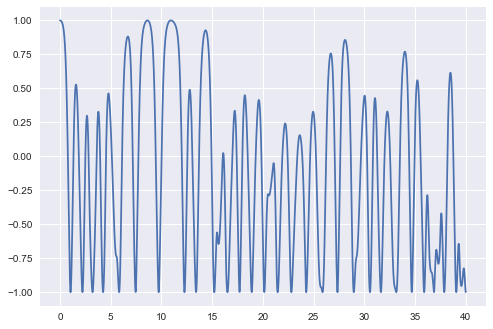

In [4]:
plt.plot(t,y1)

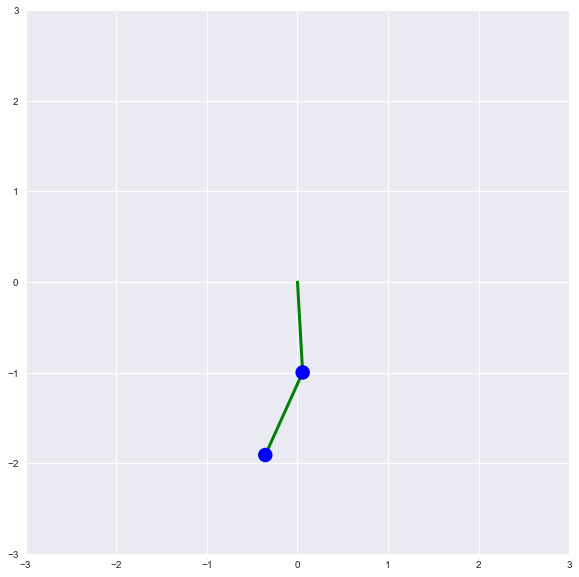

In [5]:
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(aspect = 'equal')

line1, = ax.plot([0,x1[0]], [0,y1[0]], lw=3, c = 'green')
line2, = ax.plot([x1[0],x2[0]], [y1[0],y2[0]], lw=3, c = 'green')

bob_radius = 0.08
circle1 = ax.add_patch(plt.Circle((x1[0], y1[0]), bob_radius, fc='b', zorder=3))
circle2 = ax.add_patch(plt.Circle((x2[0], y2[0]), bob_radius, fc='b', zorder=3))

ax.set_xlim([-3,3])
ax.set_ylim([-3,3])


def animate(i):
    
    line1.set_data([0, x1[i]], [0,y1[i]])
    line2.set_data([x1[i], x2[i]], [y1[i], y2[i]])
    
    circle1.set_center((x1[i], y1[i]))
    circle2.set_center((x2[i], y2[i]))
    

nframes = len(x1)
dt = t[1]-t[0]
interval = dt*1000
ani = animation.FuncAnimation(fig,animate,frames=nframes, repeat=True, interval=interval)

HTML(ani.to_html5_video())




In [8]:
ani.save(filename = 'doublepend.mp4', writer='ffmpeg', fps=60, dpi=100, metadata={'title':'doublepend anim'})